<a href="https://colab.research.google.com/github/bodamohannaik/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn
import sys

# Get the Data

In [2]:
# Download the data
import urllib.request
import tarfile

HOUSING_URL = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
HOUSING_PATH = os.path.join('datasets', 'housing')

def get_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.exists(housing_path):
    os.makedirs(housing_path,exist_ok=True)
  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
  with tarfile.open(tgz_path) as tarfp:
    tarfp.extractall(path=housing_path)
  print(f"Housing data is downloaded to {housing_path}")


In [3]:
get_housing_data()

Housing data is downloaded to datasets/housing


# Load Data


In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  housing = pd.read_csv(os.path.join(housing_path, 'housing.csv'), index_col=None)
  return housing

In [5]:
housing = load_housing_data()

# Understand the Data


In [6]:
# first 5 records
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccbd13a0d0>,
      dtype=object)

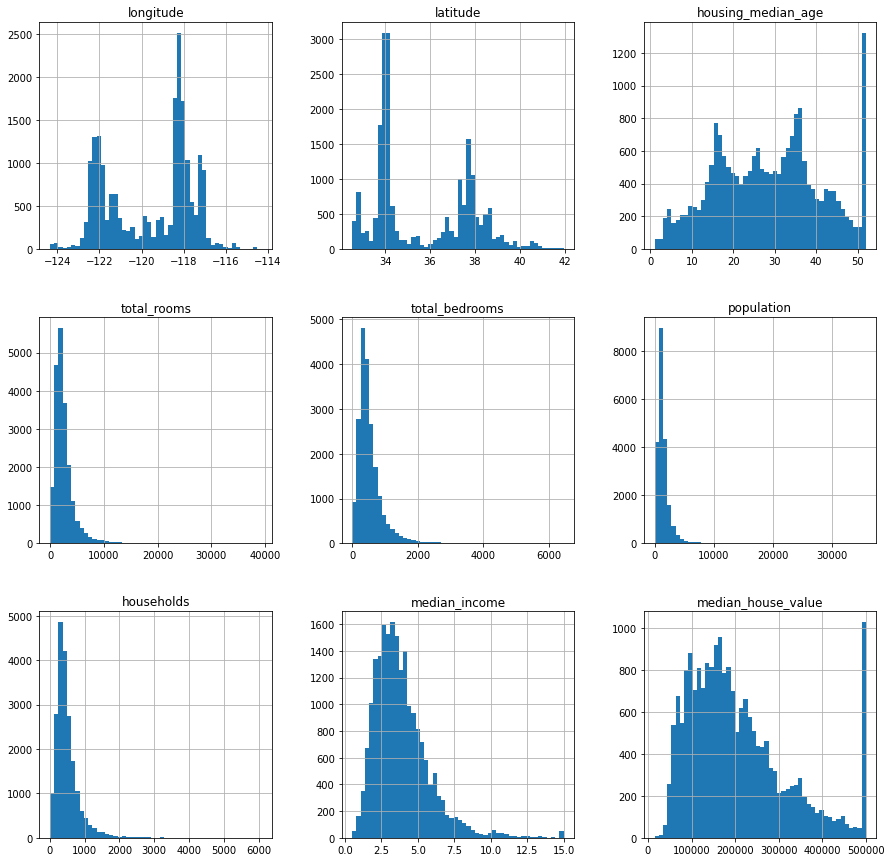

In [9]:
housing.hist(bins=50, figsize=(15,15))

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Train Test split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccbc375f10>]],
      dtype=object)

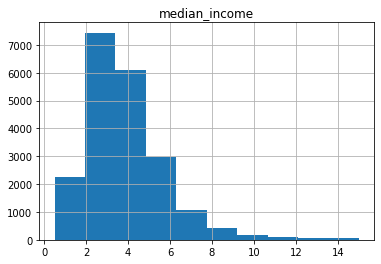

In [11]:
housing.hist('median_income')

In [12]:
housing['income_cat'] = pd.cut(x = housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5],)

In [13]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

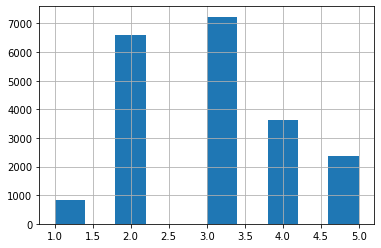

In [14]:
housing['income_cat'].hist()

In [15]:
from sklearn.model_selection import train_test_split
def  make_train_test_split(data=housing, test_size=.2, stratify_column='income_cat', random_state=33):
  strat_train_set, strat_test_set = train_test_split(data, test_size=test_size, stratify=data[stratify_column], 
                                                     random_state=random_state)
  return strat_train_set, strat_test_set

In [16]:
strat_train_set, strat_test_set = make_train_test_split()

In [17]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
# drop income cat
for dset in (strat_train_set, strat_test_set):
  dset.drop(columns=['income_cat'], inplace=True)

# Visualize

In [20]:
strat_train_set_copy = strat_train_set.copy(deep=True)

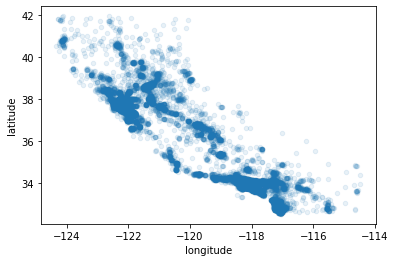

In [21]:
# location scatter plot
strat_train_set_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

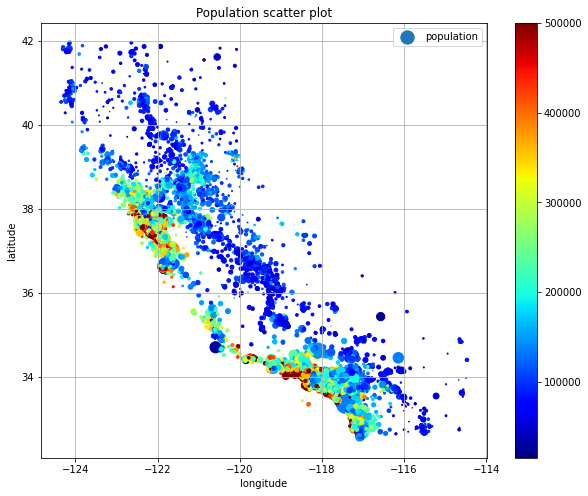

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sc = ax.scatter(x=strat_train_set_copy['longitude'], y=strat_train_set_copy['latitude'], s=strat_train_set_copy['population']/100, c=strat_train_set_copy['median_house_value'], cmap=plt.get_cmap('jet'),
           label='population')
ax.legend()
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Population scatter plot')
ax.grid(True)
fig.colorbar(sc)

In [23]:
corr = strat_train_set_copy.corr()

In [24]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924798,-0.106088,0.048040,0.072851,0.101438,0.058381,-0.014548,-0.044840
latitude,-0.924798,1.000000,0.009318,-0.040084,-0.070212,-0.109584,-0.073304,-0.082710,-0.145099
housing_median_age,-0.106088,0.009318,1.000000,-0.361480,-0.319022,-0.294252,-0.301987,-0.121291,0.102542
total_rooms,0.048040,-0.040084,-0.361480,1.000000,0.930494,0.857571,0.918665,0.197349,0.133435
total_bedrooms,0.072851,-0.070212,-0.319022,0.930494,1.000000,0.877002,0.980532,-0.007163,0.049792
population,0.101438,-0.109584,-0.294252,0.857571,0.877002,1.000000,0.904884,0.006189,-0.024276
households,0.058381,-0.073304,-0.301987,0.918665,0.980532,0.904884,1.000000,0.012743,0.065688
median_income,-0.014548,-0.082710,-0.121291,0.197349,-0.007163,0.006189,0.012743,1.000000,0.689129
median_house_value,-0.044840,-0.145099,0.102542,0.133435,0.049792,-0.024276,0.065688,0.689129,1.000000


In [25]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689129
total_rooms           0.133435
housing_median_age    0.102542
households            0.065688
total_bedrooms        0.049792
population           -0.024276
longitude            -0.044840
latitude             -0.145099
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccbbdae610>,
      dtype=object)

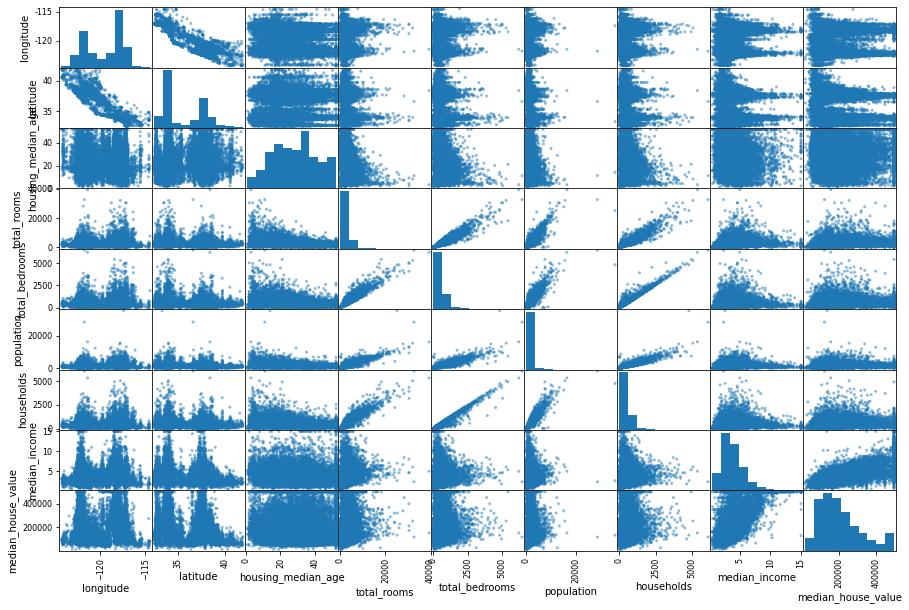

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(frame= strat_train_set_copy, figsize=(15,10))

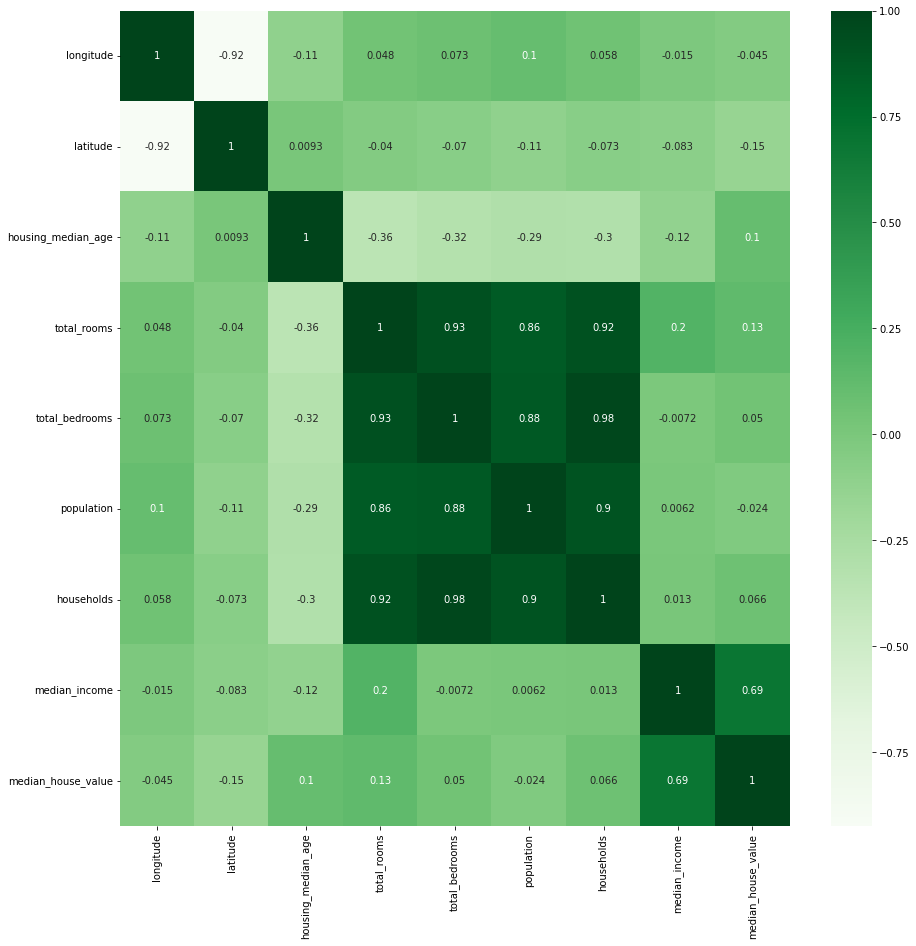

In [27]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(15,15))
heatmap(corr, annot=True, cmap='Greens')

# Derived Features

In [28]:
strat_train_set_copy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [29]:
strat_train_set_copy['rooms_per_household'] = strat_train_set_copy['total_rooms']/strat_train_set_copy['households']
strat_train_set_copy['bedrooms_per_room'] = strat_train_set_copy['total_bedrooms']/strat_train_set_copy['total_rooms']
strat_train_set_copy['population_per_household'] = strat_train_set_copy['population']/strat_train_set_copy['households']


In [30]:
corr = strat_train_set_copy.corr()
mhv = corr['median_house_value']
mhv.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689129
rooms_per_household         0.163040
total_rooms                 0.133435
housing_median_age          0.102542
households                  0.065688
total_bedrooms              0.049792
population_per_household   -0.020064
population                 -0.024276
longitude                  -0.044840
latitude                   -0.145099
bedrooms_per_room          -0.252357
Name: median_house_value, dtype: float64

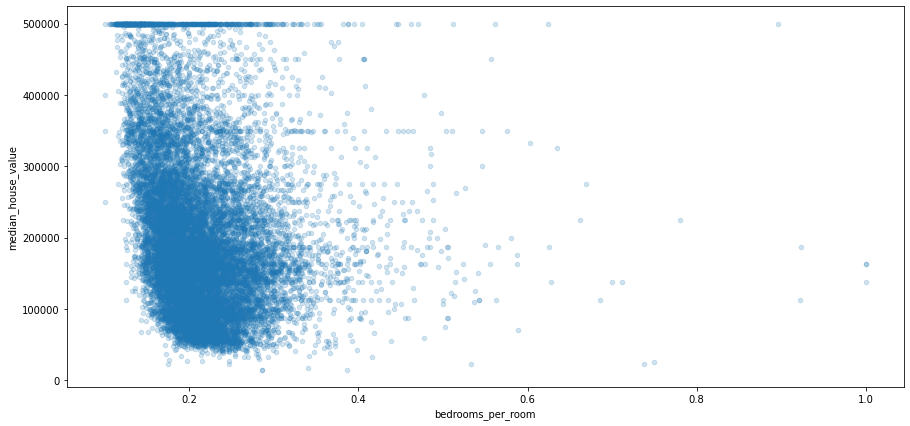

In [31]:
strat_train_set_copy.plot(kind='scatter', x='bedrooms_per_room', y='median_house_value', alpha=.2, figsize=(15,7))

# Data Preparation

In [32]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy(deep=True)

In [33]:
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3485,-118.55,34.28,16.0,8879.0,NaN,3468.0,1200.0,8.1125,<1H OCEAN
17928,-121.97,37.34,33.0,3162.0,NaN,1553.0,686.0,3.6682,<1H OCEAN
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY
3958,-118.59,34.20,21.0,1789.0,NaN,2300.0,677.0,2.7540,<1H OCEAN
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
...,...,...,...,...,...,...,...,...,...
15479,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN
4738,-118.38,34.05,49.0,702.0,NaN,458.0,187.0,4.8958,<1H OCEAN
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN


In [34]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
si.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
si.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  435.    , 1166.    ,
        410.    ,    3.5313])

In [36]:
si.transform(housing_num)

array([[-1.2008e+02,  3.6790e+01,  3.8000e+01, ...,  9.2800e+02,
         2.5500e+02,  2.9808e+00],
       [-1.2241e+02,  3.7630e+01,  3.9000e+01, ...,  2.7200e+03,
         1.0460e+03,  2.6390e+00],
       [-1.1802e+02,  3.3920e+01,  3.5000e+01, ...,  1.3120e+03,
         3.9600e+02,  3.7969e+00],
       ...,
       [-1.2130e+02,  3.8020e+01,  4.0000e+00, ...,  4.9100e+02,
         3.4800e+02,  2.8523e+00],
       [-1.1795e+02,  3.3860e+01,  3.5000e+01, ...,  1.3330e+03,
         4.2700e+02,  5.2099e+00],
       [-1.1797e+02,  3.3800e+01,  3.5000e+01, ...,  1.6140e+03,
         4.5300e+02,  5.4631e+00]])

In [37]:
# Text data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
housing_text = housing.loc[:, ['ocean_proximity']].copy(deep=True)
ohe.fit(housing_text)

OneHotEncoder()

In [38]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
ohet = ohe.transform(housing_text)

In [40]:
ohet.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [41]:
# Atributes Adder
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, total_rooms_ix]/X[:, households_ix]
    population_per_household = X[:, population_ix]/X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, total_bedrooms_ix]/X[:, total_rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [42]:
def get_col_indexes(cols = ['total_rooms', 'total_bedrooms', 'population', 'households']): 
  ixs = [housing.columns.get_loc(col) for col in cols]
  return ixs
total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = get_col_indexes()

In [43]:
total_rooms_ix, total_bedrooms_ix, population_ix, households_ix

(3, 4, 5, 6)

In [44]:
columns=list(housing.columns)+['rooms_per_household', 'population_per_household', 'bedrooms_per_room']

In [45]:
caa = CombinedAttributesAdder()

In [46]:
pd.DataFrame(caa.transform(housing.values), columns=columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-120.08,36.79,38.0,1446.0,285.0,928.0,255.0,2.9808,INLAND,5.670588,3.639216,0.197095
1,-122.41,37.63,39.0,4220.0,1055.0,2720.0,1046.0,2.639,NEAR OCEAN,4.034417,2.600382,0.25
2,-118.02,33.92,35.0,2075.0,424.0,1312.0,396.0,3.7969,<1H OCEAN,5.239899,3.313131,0.204337
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.536,INLAND,12.25,2.25,0.285714
4,-122.46,37.74,52.0,2053.0,281.0,791.0,287.0,10.959,NEAR BAY,7.15331,2.756098,0.136873
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.08,33.93,39.0,1478.0,324.0,1127.0,320.0,3.525,<1H OCEAN,4.61875,3.521875,0.219215
16508,-117.27,34.1,9.0,3904.0,1042.0,3688.0,896.0,1.8022,INLAND,4.357143,4.116071,0.266906
16509,-121.3,38.02,4.0,1515.0,384.0,491.0,348.0,2.8523,INLAND,4.353448,1.41092,0.253465
16510,-117.95,33.86,35.0,2478.0,431.0,1333.0,427.0,5.2099,<1H OCEAN,5.803279,3.12178,0.173931


In [47]:
# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                         ('attribs_adder', CombinedAttributesAdder()),
                          ('scaler', StandardScaler())])
num_pipeline.fit_transform(housing_num)

array([[-0.25545426,  0.54185973,  0.74620915, ...,  0.10392641,
         0.05387141, -0.25001741],
       [-1.41851467,  0.93467652,  0.82573031, ..., -0.589512  ,
        -0.04383248,  0.54206885],
       [ 0.77283091, -0.80026429,  0.50764568, ..., -0.07860732,
         0.02320267, -0.1415916 ],
       ...,
       [-0.86443868,  1.11705574, -1.95751015, ..., -0.45430082,
        -0.15570332,  0.59395196],
       [ 0.80777264, -0.82832263,  0.50764568, ...,  0.16016297,
         0.00520577, -0.59684111],
       [ 0.79778929, -0.85638097,  0.50764568, ...,  0.49333679,
         0.04669511, -0.82346633]])

In [48]:
num_attribs = housing_num.columns
num_attribs

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [49]:
cat_attribs = housing_text.columns
cat_attribs

Index(['ocean_proximity'], dtype='object')

In [50]:
from sklearn.compose import ColumnTransformer
full_pipeline  = ColumnTransformer(transformers = [('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(), cat_attribs)],
                                   remainder="drop")

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
final_columns = list(num_attribs)+['rooms_per_household', 'population_per_household', 'bedrooms_per_room']+list(full_pipeline.named_transformers_['cat'].categories_[0])
final_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [53]:
pd.DataFrame(housing_prepared, columns = final_columns).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.255454,0.541860,0.746209,-0.543758,-0.596543,-0.434779,-0.635779,-0.468149,0.103926,0.053871,-0.250017,0.0,1.0,0.0,0.0,0.0
1,-1.418515,0.934677,0.825730,0.716558,1.217898,1.122202,1.408262,-0.648145,-0.589512,-0.043832,0.542069,0.0,0.0,0.0,0.0,1.0
2,0.772831,-0.800264,0.507646,-0.257984,-0.269001,-0.101140,-0.271418,-0.038381,-0.078607,0.023203,-0.141592,1.0,0.0,0.0,0.0,0.0
3,-1.797882,2.187949,0.587167,-1.156197,-1.202142,-1.225433,-1.274058,-1.755610,2.892398,-0.076786,1.076783,0.0,1.0,0.0,0.0,0.0
4,-1.443473,0.986117,1.859505,-0.267979,-0.605968,-0.553811,-0.553087,3.733267,0.732330,-0.029187,-1.151669,0.0,0.0,0.0,1.0,0.0


# Select and Train the Model

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=housing_labels, y_pred=lin_reg.predict(housing_prepared), squared=False)
print(f"Linear Regression train rmse: {rmse}")

Linear Regression train rmse: 68574.68315795611


In [56]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [57]:
rmse = mean_squared_error(y_true=housing_labels, y_pred=dt_reg.predict(housing_prepared), squared=False)
print(f"Decision Tree Regression train rmse: {rmse}")

Decision Tree Regression train rmse: 0.0


# Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
def display_cross_val_score(estimator, name):
  scores = cross_val_score(estimator=estimator, X=housing_prepared, y=housing_labels, cv=10, scoring="neg_mean_squared_error")
  rmse = np.sqrt(-scores)
  print(f"cross val score : {name}")
  print(f"rmse: {rmse}")
  print(f"rmse mean: {rmse.mean()}")
  print(f"rmse std: {rmse.std()}")

In [59]:
display_cross_val_score(estimator=dt_reg, name="Decision Tree Regressor")

cross val score : Decision Tree Regressor
rmse: [67373.64127594 71271.94934958 68693.74482874 71356.35880919
 67026.28989106 75528.394721   65169.47823978 69952.03737855
 69427.7438678  75201.85143362]
rmse mean: 70100.14897952662
rmse std: 3195.1589196237296


In [60]:
display_cross_val_score(estimator=lin_reg, name="LinearRegression")

cross val score : LinearRegression
rmse: [64595.65521719 74248.94514643 70457.90944538 68452.29243557
 72931.47876072 72091.35695664 65679.00958312 65943.4071587
 65666.28075569 69243.12245839]
rmse mean: 68930.9457917827
rmse std: 3253.9978420695566


In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [62]:
rmse = mean_squared_error(y_true=housing_labels, y_pred=rf_reg.predict(housing_prepared), squared=False)
print(f"Random Forest Regression train rmse: {rmse}")

Random Forest Regression train rmse: 18588.647559493682


In [63]:
display_cross_val_score(estimator=rf_reg, name="Random Forest Regression")

cross val score : Random Forest Regression
rmse: [48518.57300218 54477.75280064 50392.78246499 50628.33365405
 49081.4405694  55238.00544291 46779.06456824 47968.5173934
 47305.17672636 50821.06978823]
rmse mean: 50121.0716410406
rmse std: 2708.605195921693


# HyperParameter Tuning

In [64]:
params = {'n_estimators': [1, 10, 20], 'min_samples_split': [2, 4, 6], 'max_features': [2, 4, 6, 8], 'bootstrap': [False, True]}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator = RandomForestRegressor(), param_grid=params, cv=5, refit=True, scoring='neg_mean_squared_error')

In [65]:
gscv.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1, 10, 20]},
             scoring='neg_mean_squared_error')

In [66]:
gscv.best_params_

{'bootstrap': False,
 'max_features': 4,
 'min_samples_split': 6,
 'n_estimators': 20}

In [67]:
np.sqrt(-gscv.best_score_)

49573.55646986213

In [68]:
best_reg = gscv.best_estimator_
display_cross_val_score(estimator=best_reg, name="Grid Search Random Forest Regressor")

cross val score : Grid Search Random Forest Regressor
rmse: [48261.62601631 54169.16768055 50119.87279864 50778.0679907
 48290.14529472 54283.32674994 47049.57060096 47555.67482688
 45883.91194248 49811.75774608]
rmse mean: 49620.31216472517
rmse std: 2692.766243348841


In [69]:
for score, params in zip(gscv.cv_results_['mean_test_score'] , gscv.cv_results_['params']):
  print((np.sqrt(-score), params))

(79191.32284213472, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 1})
(54028.71073467786, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10})
(52237.7633192014, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 20})
(80584.66491417942, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 1})
(54003.366143533916, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 10})
(52464.463619571245, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 4, 'n_estimators': 20})
(77260.52886696908, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 6, 'n_estimators': 1})
(54136.23349742131, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 6, 'n_estimators': 10})
(52162.637431705756, {'bootstrap': False, 'max_features': 2, 'min_samples_split': 6, 'n_estimators': 20})
(74343.48657740676, {'bootstrap': False, 'max_features':

In [71]:
fdf = pd.DataFrame({'feature': final_columns, 'importance': best_reg.feature_importances_})
fdf.sort_values('importance', ascending=False, inplace=True)
fdf

,feature,importance
7,median_income,0.269683
12,INLAND,0.154399
0,longitude,0.101096
9,population_per_household,0.094631
1,latitude,0.082295
8,rooms_per_household,0.079545
10,bedrooms_per_room,0.077053
2,housing_median_age,0.040803
3,total_rooms,0.019997
5,population,0.018867


# Evaluate on Test Set

In [72]:
test_housing_prepared = full_pipeline.transform(X=strat_test_set)
test_housing_labels = strat_test_set['median_house_value'].copy(deep=True)


In [73]:
test_housing_predicted_labels = best_reg.predict(test_housing_prepared)
test_rmse = np.sqrt(mean_squared_error(test_housing_labels, test_housing_predicted_labels))
print(f"Test RMSE : {test_rmse}")

Test RMSE : 47947.58366119185


In [74]:
from scipy import stats

In [78]:
confidence = .95
squared_errors = (test_housing_labels-test_housing_predicted_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45570.7271116 , 50212.05421424])

In [80]:
zscore = stats.norm.ppf((1+confidence)/2)
zscore

1.959963984540054

In [81]:
sigma = squared_errors.std()/np.sqrt(len(squared_errors))

In [82]:
zmargin = zscore*sigma
zmargin

222214419.72938502

In [84]:
np.sqrt((squared_errors.mean()-zmargin, squared_errors.mean()+zmargin))

array([45571.4423649 , 50211.40506575])

# SVR with GridSearch

In [86]:
from sklearn.svm import SVR
svr_reg = SVR()
params = [{'kernel': ['linear'], 'C': [0.1, .3, 1, 3 ,10 ,30]},
          {'kernel': ['rbf'], 'C': [0.1, .3, 1, 3, 10, 30],
           'gamma': [0.01, .03, .1, .3, 1, 3, 10]}]
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator=svr_reg, param_grid=params, cv=10, scoring='neg_mean_squared_error')
gscv.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [0.1, 0.3, 1, 3, 10, 30], 'kernel': ['linear']},
                         {'C': [0.1, 0.3, 1, 3, 10, 30],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [87]:
np.sqrt(-gscv.best_score_)

74886.18185475831

In [88]:
gscv.best_params_

{'C': 30, 'kernel': 'linear'}